In [92]:
import pandas as pd
import numpy as np
from plotnine import *

In [93]:
nba = pd.read_csv("nba-elo.csv")
nba.head()

,gameorder,game_id,lg_id,X_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,61847,201410280LAL,NBA,1,2015,10/28/2014,1,0,HOU,Rockets,...,51.586834,LAL,Lakers,90,1421.9985,1410.6588,A,W,0.605553,NaN
1,61847,201410280LAL,NBA,0,2015,10/28/2014,1,0,LAL,Lakers,...,31.337477,HOU,Rockets,108,1596.4641,1607.8038,H,L,0.394447,NaN
2,61848,201410280NOP,NBA,0,2015,10/28/2014,1,0,NOP,Pelicans,...,36.695789,ORL,Magic,84,1359.4265,1353.2910,H,W,0.757419,NaN
3,61848,201410280NOP,NBA,1,2015,10/28/2014,1,0,ORL,Magic,...,25.881901,NOP,Pelicans,101,1457.2185,1463.3540,A,L,0.242581,NaN
4,61849,201410280SAS,NBA,0,2015,10/28/2014,1,0,SAS,Spurs,...,60.040932,DAL,Mavericks,100,1592.0101,1590.3984,H,W,0.767531,NaN


In [94]:
nba.describe()

,gameorder,X_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,2622.000000,2622.000000,2622.0,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000
mean,62502.000000,0.500000,2015.0,44.446224,0.061785,100.047292,1513.032309,1513.032309,41.858539,100.047292,1513.032309,1513.032309,0.500000
std,378.525181,0.500095,0.0,25.676649,0.240810,11.765905,117.410164,117.906260,11.579118,11.765905,117.410164,117.906260,0.223187
min,61847.000000,0.000000,2015.0,1.000000,0.000000,65.000000,1235.206700,1235.206700,16.507313,65.000000,1235.206700,1235.206700,0.032248
25%,62174.250000,0.000000,2015.0,22.000000,0.000000,92.000000,1430.707325,1430.365600,33.311608,92.000000,1430.707325,1430.365600,0.323114
50%,62502.000000,0.500000,2015.0,44.000000,0.000000,100.000000,1512.708300,1512.237400,41.807413,100.000000,1512.708300,1512.237400,0.500000
75%,62829.750000,1.000000,2015.0,66.000000,0.000000,107.000000,1608.934200,1609.039975,51.707757,107.000000,1608.934200,1609.039975,0.676886
max,63157.000000,1.000000,2015.0,103.000000,1.000000,144.000000,1813.634900,1822.288100,68.519516,144.000000,1813.634900,1822.288100,0.967752


In [100]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622 entries, 0 to 2621
Data columns (total 23 columns):
gameorder        2622 non-null int64
game_id          2622 non-null object
lg_id            2622 non-null object
X_iscopy         2622 non-null int64
year_id          2622 non-null int64
date_game        2622 non-null object
seasongame       2622 non-null int64
is_playoffs      2622 non-null int64
team_id          2622 non-null object
fran_id          2622 non-null object
pts              2622 non-null int64
elo_i            2622 non-null float64
elo_n            2622 non-null float64
win_equiv        2622 non-null float64
opp_id           2622 non-null object
opp_fran         2622 non-null object
opp_pts          2622 non-null int64
opp_elo_i        2622 non-null float64
opp_elo_n        2622 non-null float64
game_location    2622 non-null object
game_result      2622 non-null object
forecast         2622 non-null float64
notes            4 non-null object
dtypes: float64(6), int

In [101]:
nba.loc[nba['notes'].notnull()]

,gameorder,game_id,lg_id,X_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
224,61959,201411120MIN,NBA,1,2015,11/12/2014,8,0,HOU,Rockets,...,54.894760,MIN,Timberwolves,101,1502.9229,1496.2412,N,W,0.682383,"at Mexico City Arena, Mexico City, Mexico"
225,61959,201411120MIN,NBA,0,2015,11/12/2014,7,0,MIN,Timberwolves,...,40.129723,HOU,Rockets,113,1635.7723,1642.4540,N,L,0.317617,"at Mexico City Arena, Mexico City, Mexico"
1170,62432,201501150MIL,NBA,0,2015,1/15/2015,40,0,MIL,Bucks,...,41.138866,NYK,Knicks,79,1304.4620,1298.5029,N,W,0.754925,"at The O2, London, England"
1171,62432,201501150MIL,NBA,1,2015,1/15/2015,41,0,NYK,Knicks,...,21.189493,MIL,Bucks,95,1499.9038,1505.8629,N,L,0.245075,"at The O2, London, England"


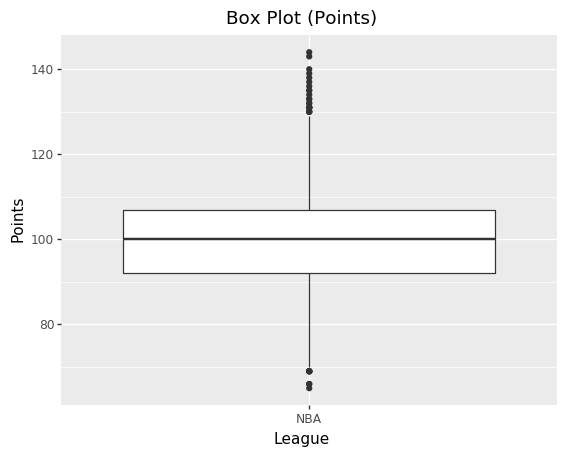

<ggplot: (312257957)>

In [95]:
(
    ggplot(nba,aes(x='lg_id',y='pts'))
    +geom_boxplot()
    +labs(x="League",y="Points",title="Box Plot (Points)")
)

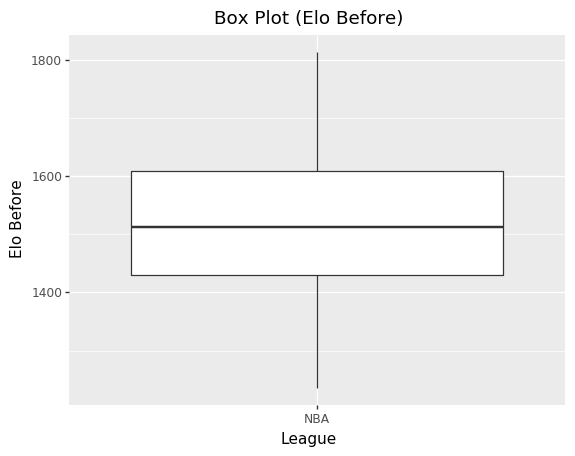

<ggplot: (309190581)>

In [96]:
(
    ggplot(nba,aes(x='lg_id',y='elo_i'))
    +geom_boxplot()
    +labs(x="League",y="Elo Before",title="Box Plot (Elo Before)")
)

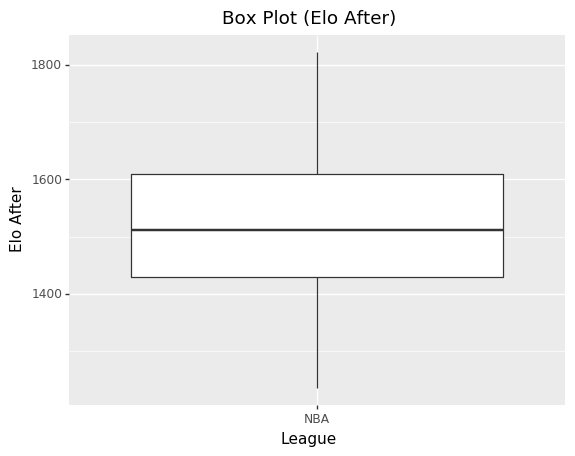

<ggplot: (309195401)>

In [97]:
(
    ggplot(nba,aes(x='lg_id',y='elo_n'))
    +geom_boxplot()
    +labs(x="League",y="Elo After",title="Box Plot (Elo After)")
)

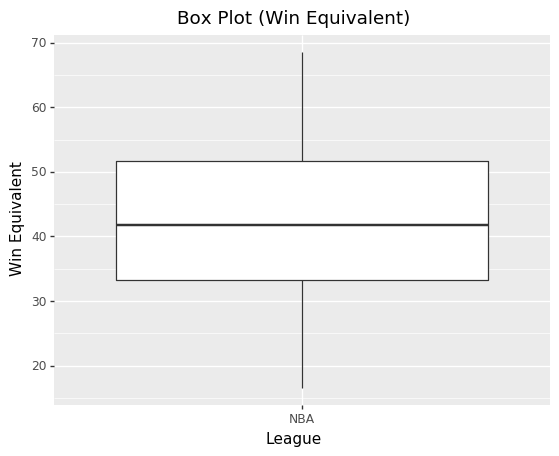

<ggplot: (309190573)>

In [98]:
(
    ggplot(nba,aes(x='lg_id',y='win_equiv'))
    +geom_boxplot()
    +labs(x="League",y="Win Equivalent",title="Box Plot (Win Equivalent)")
)

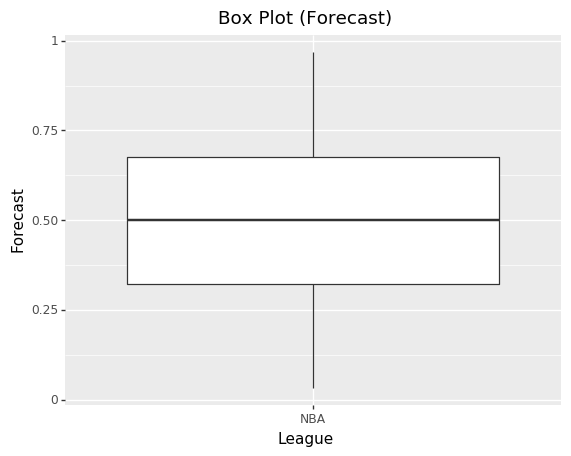

<ggplot: (313718673)>

In [99]:
(
    ggplot(nba,aes(x='lg_id',y='forecast'))
    +geom_boxplot()
    +labs(x="League",y="Forecast",title="Box Plot (Forecast)")
)

In [102]:
win = nba['game_result'] == 'W'

In [103]:
nba['isWin'] = nba['game_result'].map({'W' : 1, 'L' : 0})

In [104]:
def num_to_cat(value):
    if 0 < value <= 0.5:
        return 'Will lose'
    else:
        return 'Will Win'

nba['forecast_cat'] = nba['forecast'].apply(num_to_cat)

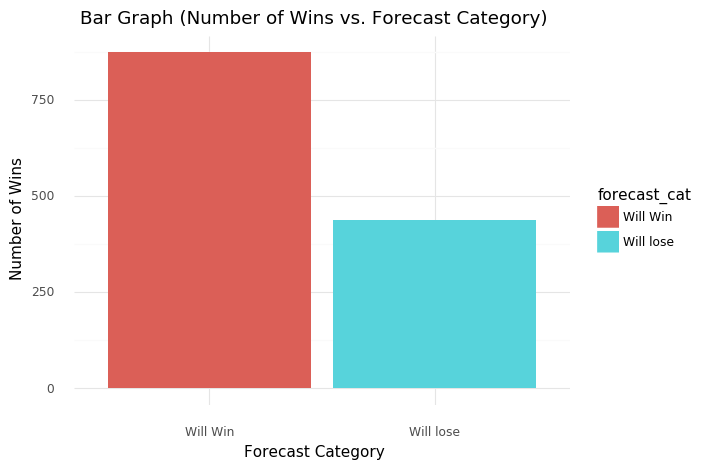

<ggplot: (315997733)>

In [115]:
(
    ggplot(nba.loc[win],aes(x='forecast_cat',y='isWin',fill='forecast_cat'))
    +geom_bar(stat='identity')
    +labs(x="Forecast Category",y="Number of Wins",title="Bar Graph (Number of Wins vs. Forecast Category)")
    +theme_minimal()
)

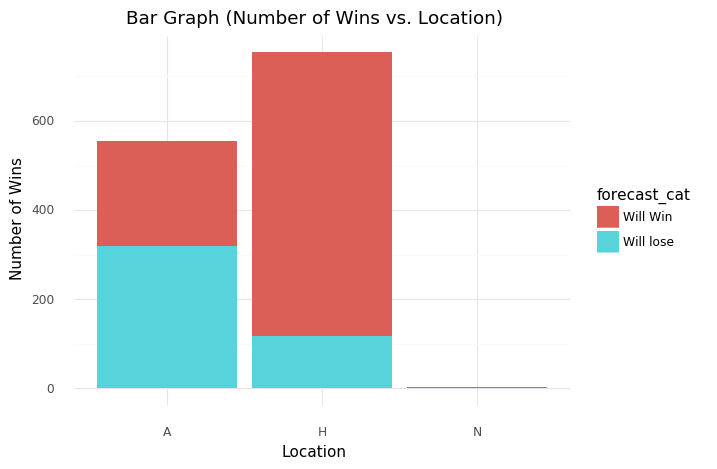

<ggplot: (314395657)>

In [114]:
(
    ggplot(nba.loc[win],aes(x='game_location',y='isWin',fill='forecast_cat'))
    +geom_bar(stat='identity')
    +labs(x="Location",y="Number of Wins",title="Bar Graph (Number of Wins vs. Location)")
    +theme_minimal()
)

In [107]:
nba['isPlayoff'] = nba['is_playoffs'].map({1 : 'Playoff', 0 : 'Not Playoff'})

In [108]:
nba['point_difference'] = nba['pts']-nba['opp_pts']
pos_pts = nba['point_difference'] > 0

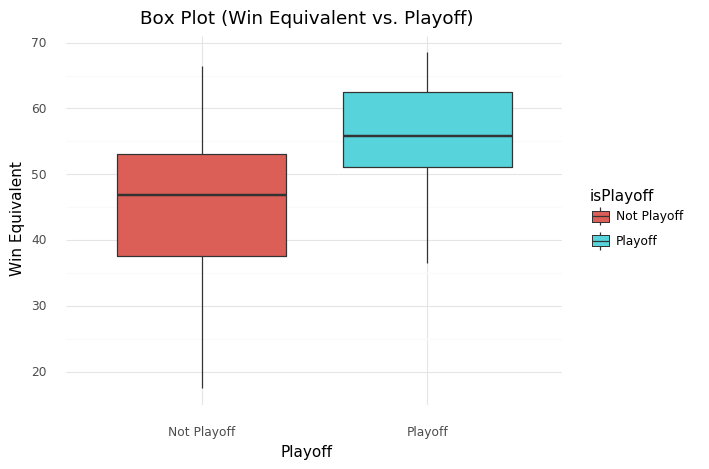

<ggplot: (315533977)>

In [110]:
(
    ggplot(nba.loc[pos_pts],aes(x='isPlayoff',y='win_equiv',fill='isPlayoff'))
    +geom_boxplot()
    +labs(x="Playoff",y="Win Equivalent",title="Box Plot (Win Equivalent vs. Playoff)")
    +theme_minimal()
)

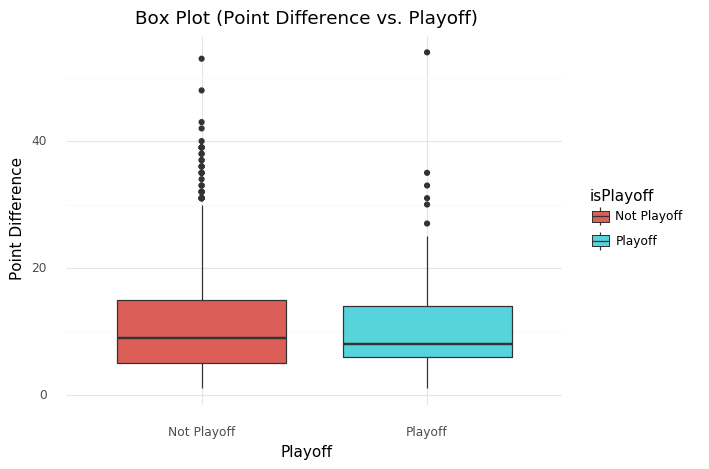

<ggplot: (313870117)>

In [111]:
(
    ggplot(nba.loc[pos_pts],aes(x='isPlayoff',y='point_difference',fill='isPlayoff'))
    +geom_boxplot()
    +labs(x="Playoff",y="Point Difference",title="Box Plot (Point Difference vs. Playoff)")
    +theme_minimal()
)

In [112]:
nba['elo_difference'] = nba['elo_i']-nba['opp_elo_i']
pos_elo = nba['elo_difference'] > 0

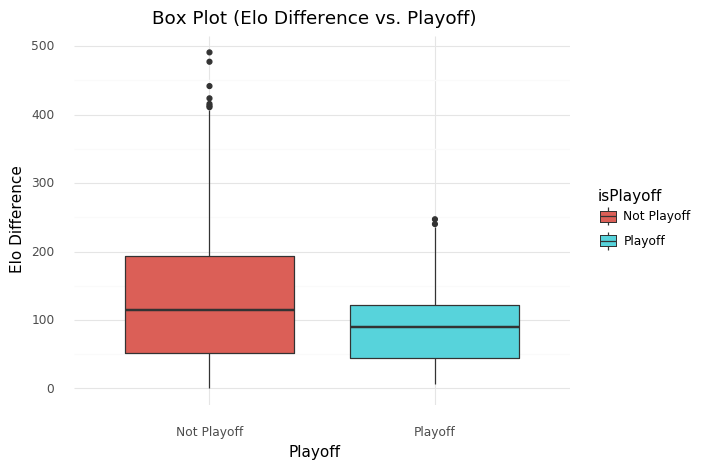

<ggplot: (313781269)>

In [113]:
(
    ggplot(nba.loc[pos_elo],aes(x='isPlayoff',y='elo_difference',fill='isPlayoff'))
    +geom_boxplot()
    +labs(x="Playoff",y="Elo Difference",title="Box Plot (Elo Difference vs. Playoff)")
    +theme_minimal()
)

# Report
Based on the info() function of the nba dataset, there are no missing values minus the notes category (which are not used in the data analysis). To find outliers, I created a series of boxplots on the numerical variables (note I did not have to create box plots on all variables since there are two records for each game). The only column that had any outliers was the pts column (and opp_pts), which had quite a bit of outliers above 130 points and 3 outliers below 70 points.

A list of categorical and numerical variables is shown below:

Categorical:
- X_isCopy
- game_result
- is_playoffs
- game_location

Numerical:
- pts
- elo_i
- elo_n
- win_equiv
- opp_pts
- opp_elo_i
- opp_elo_n
- forecast

Finally, I made a few visualizations on aspects of the data I was curious about. For one, I wanted to determine how accurate the forecast column was. As such, I plotted the number of wins vs the forecast for each game. From the data, it becomes appararent that the forecast is accurauate around two-thirds of the time. Another aspect about the data I was wondering about was whether the game location made a difference on if a team will win, and if so, by how much. In the second bar graph, I plotted the number of wins vs the game location to find out and discovered that there were roughly 200 more wins in the home column. This means that teams have a 15% more chance of winning when playing a home game vs away. This graph also gives some insight on the accuracy of the forecast displayed by color. Interestingly, around half of the forecasts made for away games that were wins were inaccurate while only 15% were inaccurate for home game victories. Another aspect of the data that I thought would be interesting to determine is how the performance of the teams varies in a playoff game vs a not a playoff game. For one, the first box plot indicates that the win eqivalent is significantly higher in the playoffs with a smaller range, indicating that the teams who play in the playoffs are generally better than teams who don't make it to the playoffs. In the next box plot, I wanted to see if the games played in the playoffs were closer games (ie. lower point difference). This appeared to be the case with playoffs having a lower median and range, however perhaps not as significant as I was expecting. However, there are far less outliers in the playoffs meaning that there aren't too many games in the playoffs that are heavily imbalanced. For the last box plot, I wanted to see how the Elo difference between the teams ranged in and not in the playoffs. As I expected, the difference between Elo ratings of the teams decreased dramatically in the playoffs. This has two implications. For one, the games are more evenly matched. In addition to this, the Elo ratings become more unreliable during the playoffs since they have a smaller range.